### Graph 1

/tmp/ipykernel_1622/2878976502.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)
/tmp/ipykernel_1622/2878976502.py:29: RuntimeWarning: invalid value encountered in double_scalars
  R1 = alpha * np.log2(1 + P1 * G1 / alpha)


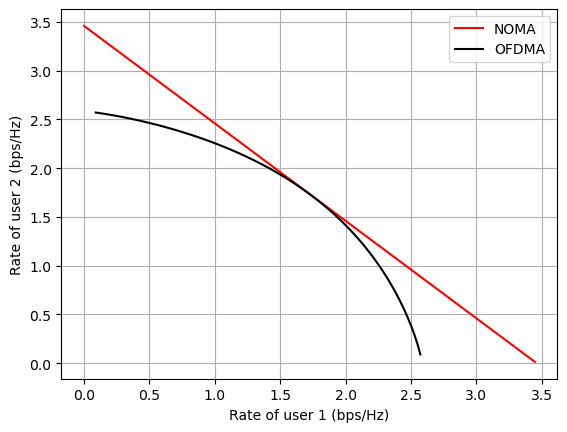

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# NOMA parameters
P = 1
G1 = 10
G2 = 10

count = 1
R1_values = []
R2_values = []
for alpha in np.arange(0, 1, 0.01):  # power splitting factor
    P1 = P * alpha
    P2 = P - P1
    R1 = np.log2(1 + P1 * G1)
    R2 = np.log2(1 + P2 * G2 / (P1 * G2 + 1))
    R1_values.append(R1)
    R2_values.append(R2)
    count += 1

plt.plot(R1_values, R2_values, 'r', label='NOMA')  # Add label for legend

count = 1
R1_values = []
R2_values = []
for alpha in np.arange(0, 1, 0.01):  # bandwidth splitting factor
    P1 = P / 2
    P2 = P / 2
    R1 = alpha * np.log2(1 + P1 * G1 / alpha)
    R2 = (1 - alpha) * np.log2(1 + P2 * G2 / (1 - alpha))
    R1_values.append(R1)
    R2_values.append(R2)
    count += 1

plt.plot(R1_values, R2_values, 'k', label='OFDMA')  # Add label for legend

plt.xlabel('Rate of user 1 (bps/Hz)')
plt.ylabel('Rate of user 2 (bps/Hz)')
plt.grid(True)  # Use True to enable grid
plt.legend()  # Show legend

plt.show()








### Graph 2

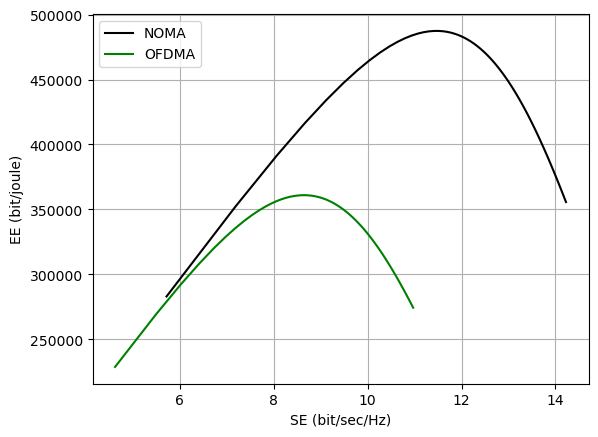

In [2]:

import numpy as np
import matplotlib.pyplot as plt

B = 5e6  # bandwidth Hz
N0 = 1e-21  # -150 dBw/Hz
N = N0 * B  # dBW
G1 = 1e-12  # -120 dB
G2 = 1e-14  # -140 dB
Pcircuit = 100  # watts

# NOMA
count = 1
SE = []
EE = []
for p in range(1, 101):  # W
    P1 = p * 0.1  # allocate less power to UE1
    P2 = p - P1
    R1 = B * np.log2(1 + P1 * G1 / N)
    R2 = B * np.log2(1 + P2 * G2 / (P1 * G2 + N))
    R = R1 + R2
    SE.append(R / B)  # bit/sec/Hz
    EE.append(R / (Pcircuit + p))  # b/joule
    count += 1

plt.plot(SE, EE, 'k')
plt.xlabel('SE (bit/sec/Hz)')
plt.ylabel('EE (bit/joule)')
plt.grid(True)

# OFDMA
count = 1
SE_line = []
EE_line = []
for p in range(1, 101):  # watts
    P1 = p / 2
    P2 = p / 2
    R1 = (B / 2) * np.log2(1 + P1 * G1 / (N0 * B / 2))
    R2 = (B / 2) * np.log2(1 + P2 * G2 / (N0 * B / 2))
    R = R1 + R2
    SE_line.append(R / B)  # bit/sec/Hz
    EE_line.append(R / (Pcircuit + p))  # bit/joule
    count += 1

plt.plot(SE_line, EE_line, 'g-')
plt.xlabel('SE (bit/sec/Hz)')
plt.ylabel('EE (bit/joule)')
plt.grid(True)
plt.legend(["NOMA", "OFDMA"])
plt.show()

